Task: понять как работает множественная регрессия на реальных данных, и сделать теперь предсказание на основе 4 независимых переменных.

Import all modules


In [24]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error, r2_score

Read data

In [25]:
df = pd.read_csv("./states.csv")
y = df["poverty"]
x = df[["metro_res", "hs_grad", "white"]]
test_x = pd.DataFrame([[80,  90, 50]])
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [26]:
x.corr()

,metro_res,hs_grad,white
metro_res,1.000000,0.018110,-0.342442
hs_grad,0.018110,1.000000,0.238156
white,-0.342442,0.238156,1.000000


In [27]:
print(df["hs_grad"].corr(df["poverty"]))
print(df["metro_res"].corr(df["poverty"]))
print(df["white"].corr(df["poverty"]))
print(df["female_house"].corr(df["poverty"]))

-0.7468582531582506
-0.2042347655605696
-0.3085200686353026
0.5253969842079922


Model


In [28]:
model = LinearRegression()

In [29]:
model.fit(x, y)

LinearRegression()

In [30]:

model.predict(test_x)

/home/vladick/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.33791117])

In [31]:
model.intercept_

68.72201512140461

In [32]:
model.coef_

array([-0.05553189, -0.56972444, -0.05332706])

Visualisation


/tmp/ipykernel_23125/1898624805.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r^" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, "r^", color="green")


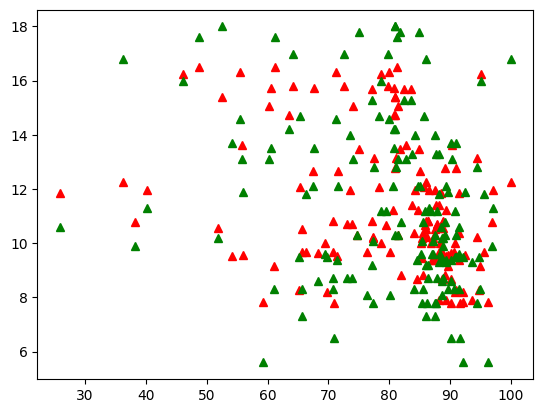

In [33]:
plt.plot(x, model.predict(x), "r^")
plt.plot(x, y, "r^", color="green")
plt.show()



In [34]:
df["poverty_predict"] = model.predict(x)
df["poverty_predict"] = df["poverty_predict"].round(1)
df["error"] =  df["poverty_predict"] - df["poverty"] 
df["error"] = df["error"] * df["error"]
y_pred = model.predict(x)
df.head()

,state,metro_res,white,hs_grad,poverty,female_house,poverty_predict,error
0,Alabama,55.4,71.3,79.9,14.6,14.2,16.3,2.89
1,Alaska,65.6,70.8,90.6,8.3,10.8,9.7,1.96
2,Arizona,88.2,87.7,83.8,13.3,11.1,11.4,3.61
3,Arkansas,52.5,81.0,80.9,18.0,12.1,15.4,6.76
4,California,94.4,77.5,81.1,12.8,12.6,13.1,0.09


In [36]:
mean_squared_error(y_pred, y)

3.3783085043464602

In [35]:

mse = sum(df["error"])
mse = mse // len(df["error"])
mse

3.0

In [16]:
r2_score(y, y_pred)

0.6412396705699455